# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder



#Carregando o dataframe
df = pd.read_csv('base_salva1.csv')
df.drop_duplicates()

#print (df.info())

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
6,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,1,34.857534,3.101370,1,1,1,0,1.0,True,False,...,True,False,False,True,False,True,False,False,False,False
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False


In [2]:
# Variáveis explicativas (X) e variável resposta (y)
y = df.mau
X = df.drop('mau',axis=1)

# Dividir os dados 70% para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionários para armazenar os conjuntos
train_data = {
    'variaveis_explicativas': X_train,
    'variavel_resposta': y_train
}

val_data = {
    'variaveis_explicativas': X_val,
    'variavel_resposta': y_val
}

# Resultados
print("Dados de Treinamento:")
print(train_data)
print("\nDados de Validação:")
print(val_data)

Dados de Treinamento:
{'variaveis_explicativas':        qtd_filhos      idade  tempo_emprego  possui_celular  \
965             0  32.616438       6.767123               1   
7874            2  47.271233      25.016438               1   
10319           2  53.778082   -1000.665753               1   
8807            0  41.487671       2.715068               1   
438             0  50.613699       8.276712               1   
...           ...        ...            ...             ...   
11284           1  39.654795       2.767123               1   
11964           0  30.457534       7.331507               1   
5390            0  64.345205   -1000.665753               1   
860             0  35.353425      11.772603               1   
15795           2  32.843836       4.101370               1   

       possui_fone_comercial  possui_fone  possui_email  \
965                        0            1             1   
7874                       0            1             0   
10319            

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
# One-Hot Encoding para variáveis categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Verificar tipos de dados
print(X_train.dtypes)

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool


In [9]:
# Definindo e treinando o modelo
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=100)

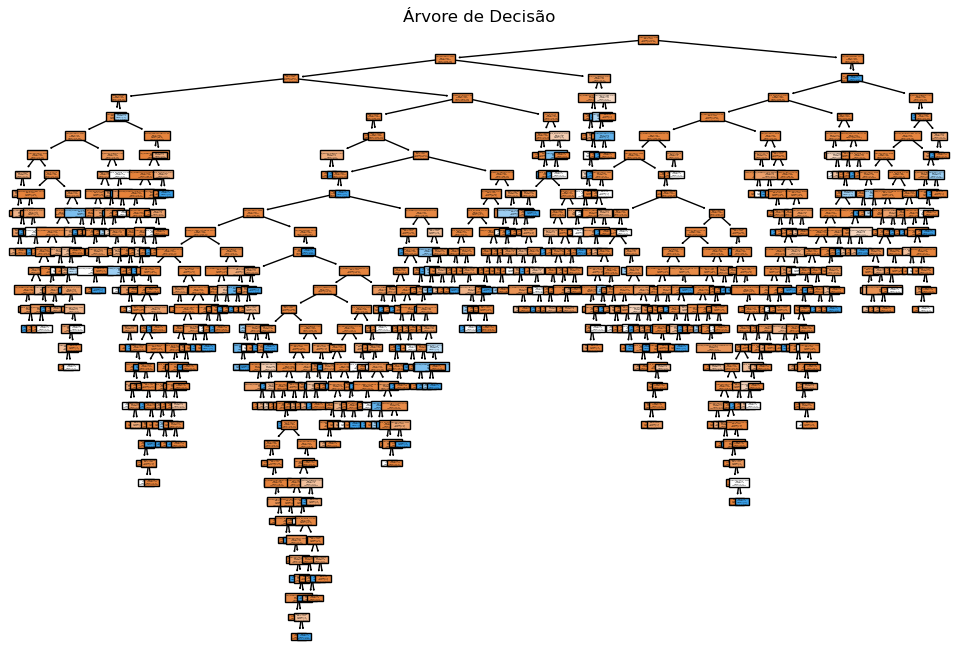

In [11]:
# Visualizando a árvore
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X_train_encoded.columns, class_names=["Reprovados", "Aprovados"], filled=True)
plt.title("Árvore de Decisão")
plt.show()

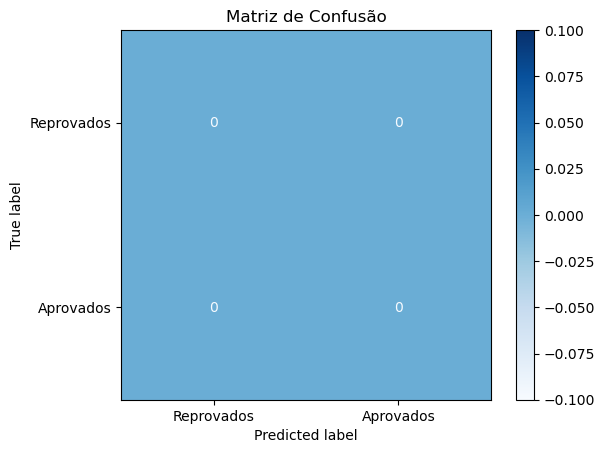

Acurácia na base de treinamento: 0.99


In [13]:
# Previsões na base de treinamento
y_train_pred = clf.predict(X_train_encoded)

# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_train_pred, labels=["False", "True"])

# Visualizando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reprovados", "Aprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

# Calculando a acurácia
acuracia = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {acuracia:.2f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificação
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train).toarray()
X_test_encoded = encoder.transform(X_test).toarray()

# Tente um modelo mais simples
try:
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_encoded, y_train)
    print("Modelo treinado com sucesso!")
except Exception as e:
    print("Erro ao treinar o modelo:", e)


Modelo treinado com sucesso!


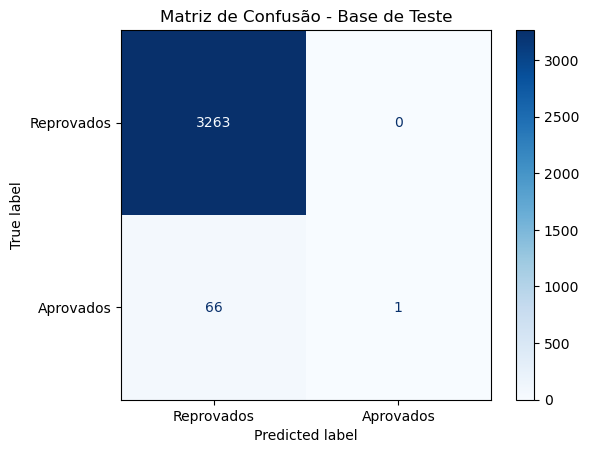

In [42]:
# Classificando a base de teste
y_test_pred = clf.predict(X_test_encoded)

# Visualizando a matriz de confusão
cm_test = confusion_matrix(y_test, y_test_pred, labels=[False, True])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Reprovados", "Aprovados"])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()



In [44]:
# Calculando a acurácia
acuracia_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia da base de teste: {acuracia_test:.2f}")

# Acurácia da base de treinamento
y_train_pred = clf.predict(X_train_encoded)
acuracia_train = accuracy_score(y_train, y_train_pred)
print(f"Acurácia da base de treinamento: {acuracia_train:.2f}")


Acurácia da base de teste: 0.98
Acurácia da base de treinamento: 0.98


In [34]:
# Treinando uma nova árvore com parâmetros especificados
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train_encoded, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

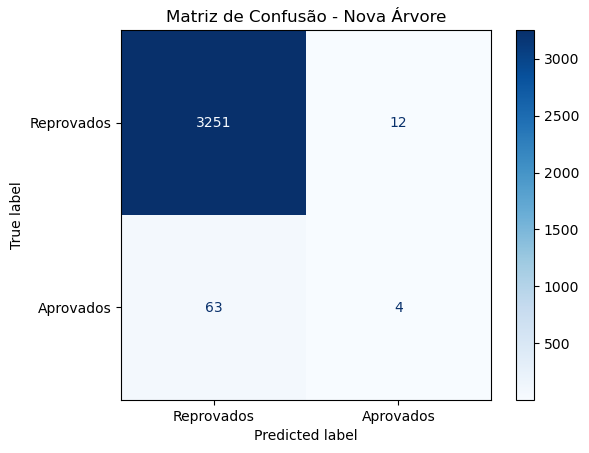

In [36]:
# Classificando a base de teste com a nova árvore
y_test_pred_nova = nova_arvore.predict(X_test_encoded)

# 10. Avaliando a matriz de classificação da nova árvore
cm_test_nova = confusion_matrix(y_test, y_test_pred_nova, labels=[False, True])
disp_test_nova = ConfusionMatrixDisplay(confusion_matrix=cm_test_nova, display_labels=["Reprovados", "Aprovados"])
disp_test_nova.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Nova Árvore")
plt.show()


In [40]:
# Proporção de proponentes classificados como 'maus'
proporcao_maus = (y_test_pred_nova[y_test == True] == False).sum() / (y_test == True).sum()
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2f}")

# Acurácia se todos os contratos fossem classificados como 'bons'
acuracia_todos_bons = (y_test == True).sum() / len(y_test)
print(f"Acurácia se todos os contratos fossem classificados como 'bons': {acuracia_todos_bons:.2f}")

Proporção de proponentes classificados como 'maus': 0.94
Acurácia se todos os contratos fossem classificados como 'bons': 0.02
